# Military Expenditure Comapred with Country Wealth and Per Capita

## Introduction

This analysis expands on Our World in Data's page "Military expenditure". This analysis puts military expensiture in perspective comparing it with each government's overall budget, GDP per country, and country size (in capita).

Citations:

[1] “Data Page: Military expenditure”, part of the following publication: Bastian Herre and Pablo Arriagada (2013) - “Military Personnel and Spending”. Data adapted from Stockholm International Peace Research Institute. Retrieved from https://ourworldindata.org/grapher/military-spending-sipri [online resource].

[2] GDP https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?end=2023&start=2023&view=bar&year=2023

[3] Expenditure General government final consumption expenditure (current US$) - World World Bank national accounts data, and OECD National Accounts data files. License : CC BY-4.0

Note. General government final consumption expenditure (formerly general government consumption) includes all government current expenditures for purchases of goods and services (including compensation of employees). It also includes most expenditures on national defense and security, but excludes government military expenditures that are part of government capital formation. Data are in current U.S. dollars.

## Data Loading and Processing

In [803]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set file path for figures
file_path = '/Users/nataschajademinnitt/Documents/5. Learning/Distribution of Things/distributionofthings.analysis/military_expenditure/figures/'

In [805]:
military_raw = pd.read_csv('https://raw.githubusercontent.com/nataschaminnitt/distributionofthings.analysis/main/military_expenditure/data/military-spending-sipri.csv')
gdp_raw = pd.read_excel("/Users/nataschajademinnitt/Documents/5. Learning/Distribution of Things/distributionofthings.analysis/military_expenditure/data/wb-country-gdp.xls")
exp_raw = pd.read_excel("/Users/nataschajademinnitt/Documents/5. Learning/Distribution of Things/distributionofthings.analysis/military_expenditure/data/wb-gov-expenditure.xls")
mil_gdp_raw = pd.read_csv("/Users/nataschajademinnitt/Documents/5. Learning/Distribution of Things/distributionofthings.analysis/military_expenditure/data/military-spending-as-a-share-of-gdp.csv")

In [807]:
# Merge military spending and military spending as a proportion of GDP
merged_military = mil_gdp_raw.merge(military_raw, on=['Entity', 'Code', 'Year'], how='left')

merged_military.rename(columns={'Entity': 'country', 
                                'Code': 'code', 
                                'Year': 'year', 
                                'Military expenditure (constant US$)': 'military_exp',
                               'Military expenditure (% of GDP)' : 'military_gdp'}, inplace=True)

merged_military.head()

,country,code,year,military_gdp,military_exp
0,Afghanistan,AFG,1919,1.001414,NaN
1,Afghanistan,AFG,1920,0.927497,NaN
2,Afghanistan,AFG,1921,1.271004,NaN
3,Afghanistan,AFG,1922,1.176579,NaN
4,Afghanistan,AFG,1923,1.287358,NaN


In [809]:
# Clean GDP dataset

# Filter columns for the country name, country code, and years between 2000 and 2022
year_columns = [str(year) for year in range(1960, 2023)]
gdp = gdp_raw[['Country Name', 'Country Code'] + year_columns].copy()

# Rename columns
gdp.rename(columns={'Country Name': 'country', 'Country Code': 'code'}, inplace=True)

# Reshape the DataFrame using melt
gdp_melted = pd.melt(gdp, id_vars=['country', 'code'], var_name='year', value_name='gdp')

# Convert years to integers
gdp_melted['year'] = gdp_melted['year'].astype(int)

# Sort values by country and year
gdp_melted = gdp_melted.sort_values(['country', 'year'])

# Display the result
gdp_melted.head()

,country,code,year,gdp
2,Afghanistan,AFG,1960,NaN
268,Afghanistan,AFG,1961,NaN
534,Afghanistan,AFG,1962,NaN
800,Afghanistan,AFG,1963,NaN
1066,Afghanistan,AFG,1964,NaN


In [811]:
# Clean expenditure dataset

# Filter columns for the country name, country code, and years between 2000 and 2022
year_columns = [str(year) for year in range(2000, 2023)]
exp = exp_raw[['Country Name', 'Country Code'] + year_columns].copy()

# Rename columns
exp.rename(columns={'Country Name': 'country', 'Country Code': 'code'}, inplace=True)

# Reshape the DataFrame using melt
exp_melted = pd.melt(exp, id_vars=['country', 'code'], var_name='year', value_name='expenditure')

# Convert years to integers
exp_melted['year'] = exp_melted['year'].astype(int)

# Sort values by country and year
exp_melted = exp_melted.sort_values(['country', 'year'])

# Display the result
exp_melted.head()

,country,code,year,expenditure
2,Afghanistan,AFG,2000,NaN
268,Afghanistan,AFG,2001,NaN
534,Afghanistan,AFG,2002,NaN
800,Afghanistan,AFG,2003,NaN
1066,Afghanistan,AFG,2004,NaN


In [813]:
# Merge the datasets on 'country', 'code' and 'year'
merged_data = merged_military.merge(gdp_melted, on=['country', 'code', 'year']) \
        .merge(exp_melted, on=['country', 'code', 'year'], how='inner')

# Display
merged_data.head()

,country,code,year,military_gdp,military_exp,gdp,expenditure
0,Afghanistan,AFG,2000,6.394596,NaN,3.521418e+09,NaN
1,Afghanistan,AFG,2001,5.271910,NaN,2.813572e+09,NaN
2,Afghanistan,AFG,2002,3.966261,NaN,3.825701e+09,NaN
3,Afghanistan,AFG,2003,2.950864,NaN,4.520947e+09,NaN
4,Afghanistan,AFG,2004,2.270991,183648340.0,5.224897e+09,NaN


In [815]:
# Calculate a per cent column for GDP and expenditure
merged_data['percent_gdp'] = merged_data['military_exp'] / merged_data['gdp'] * 100
merged_data['percent_exp'] = merged_data['military_exp'] / (merged_data['military_exp'] + merged_data['expenditure']) * 100
# Note that expendiure does not include military expenditure so it needs to be added on to calculate the tue proportion above

# Display
merged_data.head()

,country,code,year,military_gdp,military_exp,gdp,expenditure,percent_gdp,percent_exp
0,Afghanistan,AFG,2000,6.394596,NaN,3.521418e+09,NaN,NaN,NaN
1,Afghanistan,AFG,2001,5.271910,NaN,2.813572e+09,NaN,NaN,NaN
2,Afghanistan,AFG,2002,3.966261,NaN,3.825701e+09,NaN,NaN,NaN
3,Afghanistan,AFG,2003,2.950864,NaN,4.520947e+09,NaN,NaN,NaN
4,Afghanistan,AFG,2004,2.270991,183648340.0,5.224897e+09,NaN,3.51487,NaN


## The cost of war for a nation

In [824]:
# Filter the data for years between 1900 and 2020
military_years = merged_military[(merged_military["year"] >= 1900) & (merged_military["year"] <= 2020)]

# Filter the data for specific countries using `isin()`
military_recent = military_years[military_years['country'].isin(['United States', 'France', 'United Kingdom', 'Russia', 'Germany', 'Japan'])]

# Calculate the global average military_gdp for each year
global_ave = military_years.groupby('year')['military_gdp'].mean().reset_index()

# Rename the columns for clarity
global_ave.rename(columns={'military_gdp': 'global_avg_military_gdp'}, inplace=True)

# Display the first few rows of the resulting DataFrame
global_ave.head()

,year,global_avg_military_gdp
0,1900,3.379033
1,1901,3.274465
2,1902,3.216505
3,1903,2.900694
4,1904,3.106319


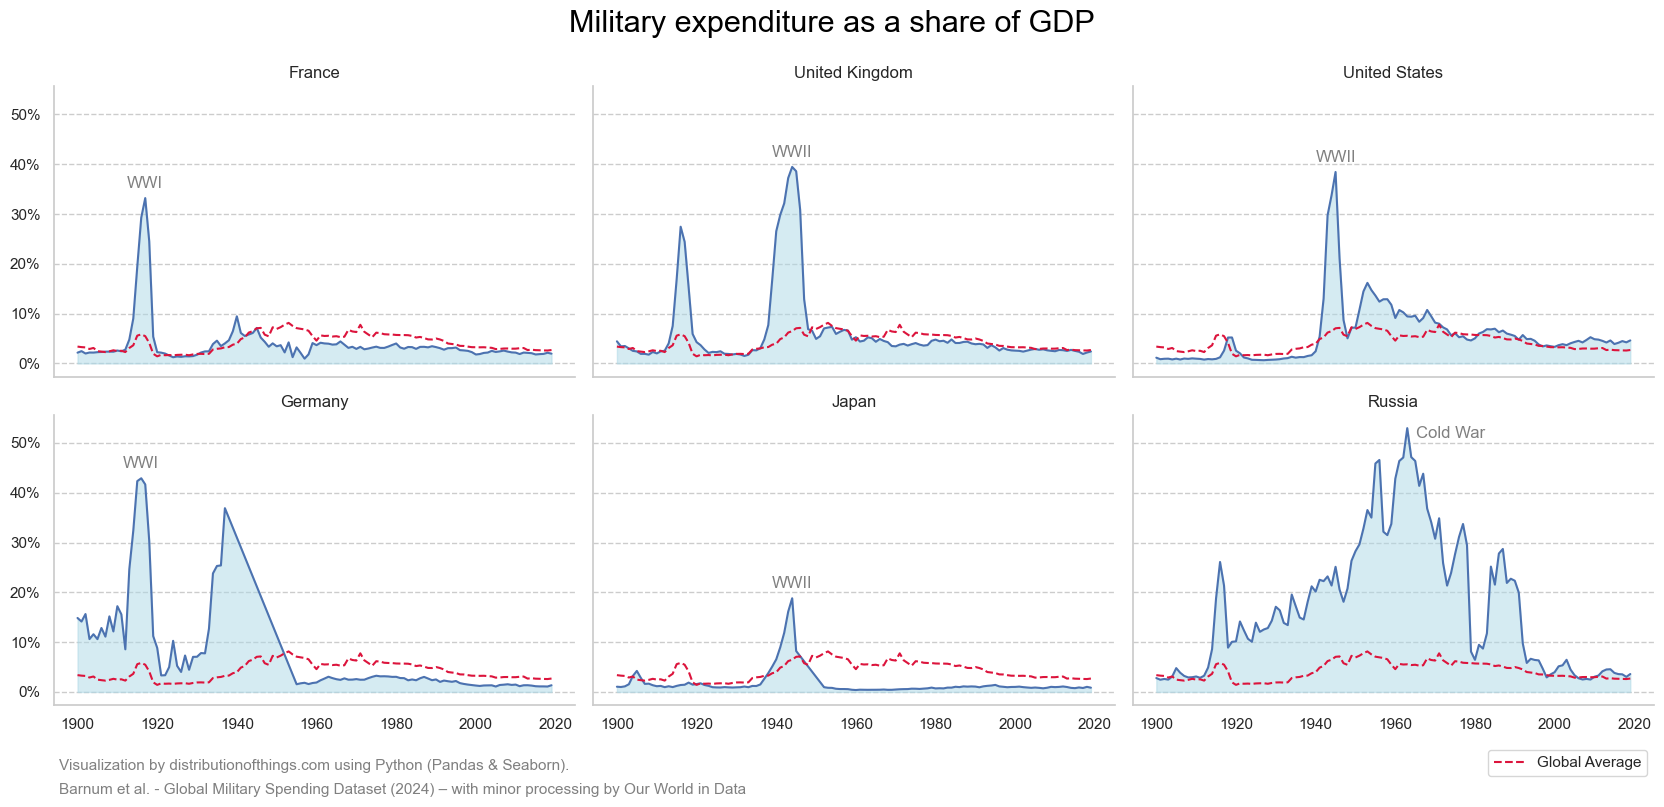

In [1003]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Set seaborn style and context
sns.set_style('whitegrid')
sns.set_context('notebook')

# Define the order of the countries
col_order = ['France', 'United Kingdom', 'United States', 'Germany', 'Japan', 'Russia']

# Plot
g = sns.relplot(data=military_recent, x='year', y='military_gdp', kind='line', 
                col='country', col_order=col_order, col_wrap=3, height=4, aspect=1.4, color='#4C72B0')

for ax in g.axes.flat:
    ax.plot(global_ave['year'], global_ave['global_avg_military_gdp'], color='crimson', linestyle='--', linewidth=1.5, label='Global Average')

# Labelling
g.set(xlabel='',
      ylabel='')

# Format y-axis as percentage, set grid, and fill the area under the lines
for ax, country_name in zip(g.axes.flat, col_order):
    country_data = military_recent[military_recent['country'] == country_name]
    ax.yaxis.set_major_formatter(PercentFormatter())  # Add % symbol
    ax.grid(True, axis='y', linestyle='--')  # Only horizontal dashed gridlines
    ax.grid(False, axis='x')  # Disable vertical gridlines
    ax.fill_between(country_data['year'], country_data['military_gdp'], color='lightblue', alpha=0.5)
    if country_name == 'United States':
        max_value = country_data['military_gdp'].max()
        max_year = country_data.loc[country_data['military_gdp'].idxmax(), 'year']
        ax.text(max_year, max_value + 2, 'WWII', fontsize=12, color='grey', ha='center')
    if country_name == 'France':
        max_value = country_data['military_gdp'].max()
        max_year = country_data.loc[country_data['military_gdp'].idxmax(), 'year']
        ax.text(max_year, max_value + 2, 'WWI', fontsize=12, color='grey', ha='center')
    if country_name == 'United Kingdom':
        max_value = country_data['military_gdp'].max()
        max_year = country_data.loc[country_data['military_gdp'].idxmax(), 'year']
        ax.text(max_year, max_value + 2, 'WWII', fontsize=12, color='grey', ha='center')
    if country_name == 'Russia':
        max_value = country_data['military_gdp'].max()
        max_year = country_data.loc[country_data['military_gdp'].idxmax(), 'year']
        ax.text(max_year + 11, max_value - 2, 'Cold War', fontsize=12, color='grey', ha='center')
    if country_name == 'Germany':
        max_value = country_data['military_gdp'].max()
        max_year = country_data.loc[country_data['military_gdp'].idxmax(), 'year']
        ax.text(max_year, max_value + 2, 'WWI', fontsize=12, color='grey', ha='center')
    if country_name == 'Japan':
        max_value = country_data['military_gdp'].max()
        max_year = country_data.loc[country_data['military_gdp'].idxmax(), 'year']
        ax.text(max_year, max_value + 2, 'WWII', fontsize=12, color='grey', ha='center')
    

# Set the overall title for the figure
g.fig.suptitle('Military expenditure as a share of GDP', y=0.99, fontsize=22, color='black')
g.set_titles("{col_name}")
plt.legend(title='', loc='right', bbox_to_anchor=(0.99, -0.2), borderaxespad=0.1)

# Citations
plt.figtext(0.04, 0.04, 'Visualization by distributionofthings.com using Python (Pandas & Seaborn).', 
            wrap=True, horizontalalignment='left', fontsize=11, color='gray')
plt.figtext(0.04, 0.01, 'Barnum et al. - Global Military Spending Dataset (2024) – with minor processing by Our World in Data', 
            wrap=True, horizontalalignment='left', fontsize=11, color='gray')

# Show the plot
plt.tight_layout()
plt.savefig(file_path + "cost-war-for-a-nation.png", dpi=300)
plt.show()

## Most countries devote resources to their military even in the absence of conflict

<Figure size 800x1200 with 0 Axes>

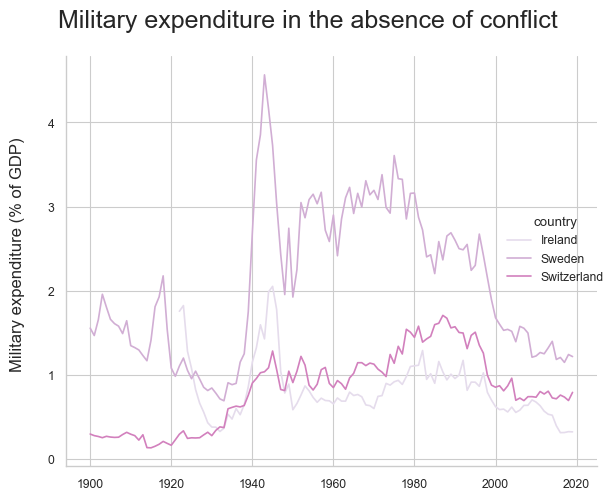

In [909]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Set seaborn style and context
sns.set_style('whitegrid')
sns.set_context('paper')
plt.figure(figsize=(8, 12))

# Define the order of the countries
col_order = ['Switzerland', 'Sweden', 'Ireland']

# Filter the dataset to include only the selected countries
military_neutral = military_years[military_years['country'].isin(col_order)]

# Plot a line for each country
g = sns.relplot(data=military_neutral, x='year', y='military_gdp', kind='line', hue='country', legend=True)
ax.yaxis.set_major_formatter(PercentFormatter())  # Add % symbol

# Labelling
g.fig.supylabel('Military expenditure (% of GDP)', x=0.01, fontsize=12)  # Y-axis label
g.set(xlabel='', ylabel='')

# Set the overall title for the figure
g.fig.suptitle('Military expenditure in the absence of conflict', y=0.99, fontsize=18)

# Show the plot
plt.tight_layout()
plt.savefig(file_path + "Military expenditure in the absence of conflict.png", dpi=300)
plt.show()

## Military spending as a share of GDP for select countries

In [537]:
# Filter the data for years between 1900 and 2020
last_ten = merged_military[(merged_military["year"] >= 2010) & (merged_military["year"] <= 2019)]

# Calculate the global average military_gdp for each year
country_ave = last_ten.groupby('country')['military_gdp'].mean().reset_index()

# Rename the columns for clarity
country_ave.rename(columns={'military_gdp': 'country_avg_military_gdp'}, inplace=True)

# Display the first few rows of the resulting DataFrame
country_ave.head()

,country,country_avg_military_gdp
0,Afghanistan,5.942847
1,Albania,1.325524
2,Algeria,5.757554
3,Angola,3.624878
4,Argentina,1.055355


In [539]:
global_mean = np.mean(country_ave['country_avg_military_gdp'])
global_std = country_ave['country_avg_military_gdp'].std()
print(global_mean)
print(global_std)

3.1658849698256186
10.35476166966301


In [911]:
country_ave.describe()

,country_avg_military_gdp,diff,std_diff
count,168.000000,1.680000e+02,1.680000e+02
mean,3.165885,1.691768e-16,3.172066e-17
std,10.354762,1.035476e+01,1.000000e+00
min,0.058209,-3.107676e+00,-3.001204e-01
25%,1.041377,-2.124508e+00,-2.051721e-01
50%,1.527083,-1.638802e+00,-1.582656e-01
75%,2.457964,-7.079205e-01,-6.836666e-02
max,97.666667,9.450078e+01,9.126312e+00


In [543]:
# Creat a diff column
country_ave['diff'] = country_ave['country_avg_military_gdp'] - global_mean
country_ave['std_diff'] = (country_ave['country_avg_military_gdp'] - global_mean) / global_std
country_ave.head(15)

,country,country_avg_military_gdp,diff,std_diff
0,Afghanistan,5.942847,2.776962,0.268182
1,Albania,1.325524,-1.840361,-0.177731
2,Algeria,5.757554,2.591669,0.250288
3,Angola,3.624878,0.458993,0.044327
4,Argentina,1.055355,-2.110530,-0.203822
5,Armenia,4.524637,1.358752,0.131220
6,Australia,2.028279,-1.137606,-0.109863
7,Austria,0.788610,-2.377275,-0.229583
8,Azerbaijan,3.527857,0.361972,0.034957
9,Bahamas,0.863302,-2.302583,-0.222369


In [545]:
top_ten = country_ave.sort_values('std_diff', ascending=False).head(10)
top_ten.head(10)

,country,country_avg_military_gdp,diff,std_diff
146,Syria,97.666667,94.500782,9.126312
147,Taiwan,94.300000,91.134115,8.801179
118,Oman,11.286018,8.120133,0.784193
131,Saudi Arabia,9.711118,6.545233,0.632099
76,Israel,7.294984,4.129099,0.398763
91,Libya,6.935709,3.769824,0.364067
74,Iraq,6.434619,3.268734,0.315674
165,Yemen,6.281100,3.115215,0.300849
0,Afghanistan,5.942847,2.776962,0.268182
2,Algeria,5.757554,2.591669,0.250288


In [547]:
bottom_ten = country_ave.sort_values('std_diff', ascending=True).head(10)
bottom_ten.head(10)

,country,country_avg_military_gdp,diff,std_diff
67,Haiti,0.058209,-3.107676,-0.300120
86,Laos,0.249898,-2.915987,-0.281608
70,Iceland,0.294932,-2.870953,-0.277259
103,Moldova,0.347415,-2.818470,-0.272191
163,Venezuela,0.356180,-2.809705,-0.271344
75,Ireland,0.463452,-2.702433,-0.260985
115,Nigeria,0.486983,-2.678902,-0.258712
102,Mexico,0.497613,-2.668272,-0.257686
61,Ghana,0.500606,-2.665279,-0.257396
93,Luxembourg,0.518964,-2.646921,-0.255624


In [592]:
middle = country_ave[(country_ave["country"] == 'Russia')]
print(middle)

    country  country_avg_military_gdp      diff  std_diff
129  Russia                  3.716686  0.550801  0.053193


In [596]:
# Filter the data for specific countries using `isin()`
country_selected = country_ave[country_ave['country'].isin(['Oman', #Top
                                                            'Saudi Arabia', 
                                                            'Israel', 
                                                            'Algeria',
                                                            'United States',
                                                            'Russia',
                                                            'Cambodia',
                                                           'South Korea',
                                                            'Ukraine',
                                                            'Germany',
                                                           'Philippines',
                                                            'Venezuela'])]

category_order = ['Oman', 'Saudi Arabia', 'Israel', 'Algeria', 'United States', 'Russia', 'Cambodia', 'South Korea', 'Ukraine', 'Germany', 'Philippines', 'Venezuela']

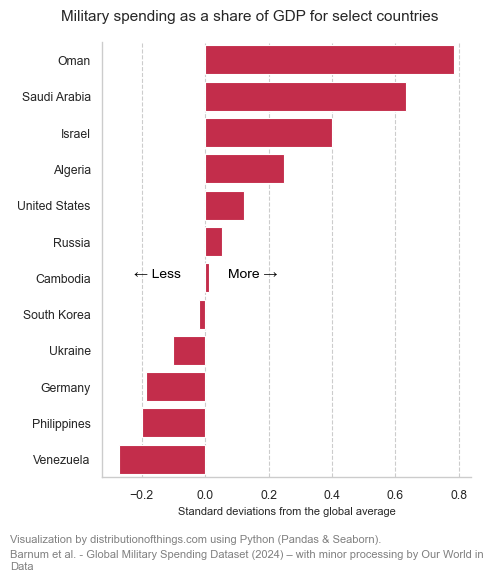

In [1057]:
sns.set_style('whitegrid')
sns.set_context('paper')

# Plot
sns.catplot(data=country_selected, x='std_diff', y='country', kind='bar', order=category_order, color='crimson')
plt.grid(True, axis='x', linestyle='--')
ax.set_xlim([-3, 1.5])

# Labelling
plt.title('Military spending as a share of GDP for select countries', fontsize= 11, ha='center', y=1.03, x=0.4)
plt.xlabel('Standard deviations from the global average', fontsize=8, y=-0.02)
plt.ylabel('', fontsize=12)

# Annotate
plt.text(-0.15, 6, '← Less', ha='center', fontsize=10, color='black')
plt.text(0.15, 6, 'More →', ha='center', fontsize=10, color='black')

# Citation
plt.figtext(0.05, -0.03, 'Visualization by distributionofthings.com using Python (Pandas & Seaborn).', 
            wrap=True, horizontalalignment='left', fontsize=8, color='gray')
plt.figtext(0.05, -0.08, 'Barnum et al. - Global Military Spending Dataset (2024) – with minor processing by Our World in Data', 
            wrap=True, horizontalalignment='left', fontsize=8, color='gray')

# Adjust the layout to give even more space for the citations
plt.subplots_adjust(bottom=0.1)

# Save the figure with proper spacing
plt.savefig(file_path + "military-spending-as-a-share-of-gdp.png", dpi=300, bbox_inches='tight')
plt.show()